In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
from pyspark.sql import SparkSession
#create session
spark = SparkSession.builder.appName("ipl data analysis").getOrCreate()

In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
from pyspark.sql.types import (
    StructType, StructField, IntegerType, StringType, BooleanType, DateType
)

ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True),
])


In [0]:
ball_by_ball = spark.read.schema(ball_by_ball_schema).format("csv").option("header","true").load("s3://ipl2/Ball_By_Ball.csv")

In [0]:
ball_by_ball.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|nonstriker_sk|fielder_match_sk|

In [0]:
from pyspark.sql.types import(StructType,StructField,IntegerType,StringType,BooleanType,DateType,DecimalType)

match_schema = StructType([
    StructField("match_sk",IntegerType(),True),
    StructField("match_id",IntegerType(),True),
    StructField("team1",StringType(),True),
    StructField("team2",StringType(),True),
    StructField("match_date",DateType(),True),
    StructField("season_year",DateType(),True),
    StructField("venue_name",StringType(),True),
    StructField("city_name",StringType(),True),
    StructField("country_name",StringType(),True),
    StructField("toss_winner",StringType(),True),
    StructField("toss_name",StringType(),True),
    StructField("win_type",StringType(),True),
    StructField("manofmach",StringType(),True),
    StructField("win_margin",IntegerType(),True),
    StructField("country_id",IntegerType(),True),
])
Match = spark.read.schema(match_schema).format("csv").option("header","true").load("s3://ipl2/Match.csv")
Match.show(5)

 


+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+--------+---------+----------+----------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|           toss_name|win_type|manofmach|win_margin|country_id|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+--------+---------+----------+----------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null| 2008-01-01|M Chinnaswamy Sta...| Bangalore|       India|Royal Challengers...|Kolkata Knight Ri...|   field|     runs|      null|      null|
|       1|  335988|     Kings XI Punjab| Chennai Super Kings|      null| 2008-01-01|Punjab Cricket As...|Chandigarh|       India| Chennai Super King

In [0]:
Player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
])
Player = spark.read.schema(Player_schema).format("csv").option("header","true").load("s3://ipl2/Player.csv")
Player.show()


+---------+---------+---------------+----+--------------+--------------------+------------+
|player_sk|player_id|    player_name| dob|  batting_hand|       bowling_skill|country_name|
+---------+---------+---------------+----+--------------+--------------------+------------+
|        0|        1|     SC Ganguly|null| Left-hand bat|    Right-arm medium|       India|
|        1|        2|    BB McCullum|null|Right-hand bat|    Right-arm medium| New Zealand|
|        2|        3|     RT Ponting|null|Right-hand bat|    Right-arm medium|   Australia|
|        3|        4|      DJ Hussey|null|Right-hand bat|  Right-arm offbreak|   Australia|
|        4|        5|Mohammad Hafeez|null|Right-hand bat|  Right-arm offbreak|    Pakistan|
|        5|        6|       R Dravid|null|Right-hand bat|  Right-arm offbreak|       India|
|        6|        7|       W Jaffer|null|Right-hand bat|  Right-arm offbreak|       India|
|        7|        8|        V Kohli|null|Right-hand bat|    Right-arm medium|  

In [0]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(38, 18), True),  
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),  
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True),
])
Player_match = spark.read.schema(player_match_schema).format("csv").option("header","true").load("s3://ipl2/Player_match.csv")
Player_match.show()

+---------------+--------------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+
|player_match_sk|     playermatch_key|match_id|player_id|    player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|
+---------------+--------------------+--------+---------+---------------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------

In [0]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True),
])
Team = spark.read.schema(team_schema).format("csv").option("header","true").load("s3://ipl2/Team.csv")
Team.show()


+-------+-------+--------------------+
|team_sk|team_id|           team_name|
+-------+-------+--------------------+
|      0|      1|Kolkata Knight Ri...|
|      1|      2|Royal Challengers...|
|      2|      3| Chennai Super Kings|
|      3|      4|     Kings XI Punjab|
|      4|      5|    Rajasthan Royals|
|      5|      6|    Delhi Daredevils|
|      6|      7|      Mumbai Indians|
|      7|      8|     Deccan Chargers|
|      8|      9|Kochi Tuskers Kerala|
|      9|     10|       Pune Warriors|
|     10|     11| Sunrisers Hyderabad|
|     11|     12|Rising Pune Super...|
|     12|     13|       Gujarat Lions|
+-------+-------+--------------------+



In [0]:
from pyspark.sql.functions import avg,col,sum,row_number,when
from pyspark.sql.window import Window

In [0]:
#BALL BY BALL BUSINESS REQUIREMENTS
#1. filter to include only valid deliveries(excluding extras like wides and noballs for specific analysis)
ball_by_ball = ball_by_ball.filter ((col("wides")==0) & (col("noballs")==0))

#2.Aggregation:Calculate the total and average runs scored in each match and inning
ttl_and_avg = ball_by_ball.groupby("match_id","innings_no").agg(
    sum("runs_scored").alias("total_runs"),
    avg("runs_scored").alias("avg_runs"))

#3.Window function
#calculate running total of runs in each match for each over
windowspec = Window.partitionBy("match_id","innings_no").orderBy("over_id")
ball_by_ball = ball_by_ball.withColumn(
    "running_total_runs",
sum("runs_scored").over(windowspec))

#4.Conditional column
#flag for high impact balls(either a wicket or more than a 6runs including extras)
ball_by_ball = ball_by_ball.withColumn(
    "high impact",
when((col("runs_scored") + col("extra_runs") >6) | (col("bowler_wicket")==True),True).otherwise(False)
)


In [0]:
ball_by_ball.show()

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+------------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|

In [0]:

from pyspark.sql.functions import year, month, dayofmonth, when

# Extracting year, month, and day from the match date for more detailed time-based analysis
Match = Match.withColumn("year", year("match_date"))
Match = Match.withColumn("month", month("match_date"))
Match = Match.withColumn("day", dayofmonth("match_date"))

# High margin win: categorizing win margins into 'high', 'medium', and 'low'
Match = Match.withColumn(
    "win_margin_category",
    when(col("win_margin") >= 100, "High")
    .when((col("win_margin") >= 50) & (col("win_margin") < 100), "Medium")
    .otherwise("Low")
)

# Analyze the impact of the toss:finding the team who won the toss in their home ground
Match = Match.withColumn(
    "toss_Match_Winner",
    when(col("toss_winner") == col("venue_name"), "Yes").otherwise("No")
)
Match.show(2)



+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+--------+---------+----------+----------+----+-----+----+-------------------+-----------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|           toss_name|win_type|manofmach|win_margin|country_id|year|month| day|win_margin_category|toss_Match_Winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+--------+---------+----------+----------+----+-----+----+-------------------+-----------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null| 2008-01-01|M Chinnaswamy Sta...| Bangalore|       India|Royal Challengers...|Kolkata Knight Ri...|   field|     runs|      nul

In [0]:
from pyspark.sql.functions import lower,regexp_replace
# Normalize and clean player names
Player = Player.withColumn("player_name", lower(regexp_replace("player_name", "[^a-zA-Z0-9 ]", "")))
# Handle missing values in 'batting_hand' and 'bowling_skill' with a default 'unknown'
Player = Player.na.fill({"batting_hand":"unknown","bowling_skill":"unknown"})
# Categorizing players based on batting hand
Player = Player.withColumn("battingstyle",
                                       when(col("batting_hand").contains("left"),("left_handed")).otherwise("right_handed")
                                            )
#seperating the indian players
Player = Player.withColumn("indian_players",
                           when(col("country_name").contains("India"), col("player_name")).otherwise("foreigner")
                           )
Player.show(2)

+---------+---------+-----------+----+--------------+----------------+------------+------------+--------------+
|player_sk|player_id|player_name| dob|  batting_hand|   bowling_skill|country_name|battingstyle|indian_players|
+---------+---------+-----------+----+--------------+----------------+------------+------------+--------------+
|        0|        1| sc ganguly|null| Left-hand bat|Right-arm medium|       India|right_handed|    sc ganguly|
|        1|        2|bb mccullum|null|Right-hand bat|Right-arm medium| New Zealand|right_handed|     foreigner|
+---------+---------+-----------+----+--------------+----------------+------------+------------+--------------+
only showing top 2 rows



In [0]:
from pyspark.sql.functions import col, when, current_date, expr
# Add a 'veteran_status' column based on player age
Player_match = Player_match.withColumn("veteran_status",
                                       when(col("age_as_on_match")>=30,"veteran").otherwise("not_viteran")
                                       )
                    
Player_match = Player_match.withColumn("plaingyear",
                                       (year(current_date()) - col("season_year"))
)
Player_match.show(2)


+---------------+--------------------+--------+---------+-----------+----+--------------+------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+--------------+----------+
|player_match_sk|     playermatch_key|match_id|player_id|player_name| dob|  batting_hand|     bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|veteran_status|plaingyear|
+---------------+--------------------+--------+---------+-----------+----+--------------+------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+----------

In [0]:
ball_by_ball.createOrReplaceTempView("ball_by_balls")
Match.createOrReplaceTempView("Matchs")
Player.createOrReplaceTempView("Players")
Player_match.createOrReplaceTempView("Player_matchs")
Team.createOrReplaceTempView("Teams")

In [0]:
top_scoring_batsmen_per_season = spark.sql("""
SELECT 
p.player_name,
m.season_year,
SUM(b.runs_scored) AS total_runs 
FROM ball_by_balls b
JOIN Matchs m ON b.match_id = m.match_id   
JOIN Player_matchs pm ON m.match_id = pm.match_id AND b.striker = pm.player_id     
JOIN Players p ON p.player_id = pm.player_id
GROUP BY p.player_name, m.season_year
ORDER BY m.season_year, total_runs DESC
""")
     


In [0]:
top_scoring_batsmen_per_season.show(30)

+---------------+-----------+----------+
|    player_name|season_year|total_runs|
+---------------+-----------+----------+
|       se marsh| 2008-01-01|       614|
|      g gambhir| 2008-01-01|       532|
|  st jayasuriya| 2008-01-01|       508|
|      sr watson| 2008-01-01|       463|
|       gc smith| 2008-01-01|       437|
|   ac gilchrist| 2008-01-01|       431|
|      yk pathan| 2008-01-01|       430|
|       sk raina| 2008-01-01|       420|
|       ms dhoni| 2008-01-01|       414|
|       v sehwag| 2008-01-01|       399|
|      rg sharma| 2008-01-01|       399|
|       r dravid| 2008-01-01|       370|
|     sc ganguly| 2008-01-01|       349|
|       s dhawan| 2008-01-01|       340|
|  kc sangakkara| 2008-01-01|       319|
|      dj hussey| 2008-01-01|       318|
|     rv uthappa| 2008-01-01|       316|
|    sa asnodkar| 2008-01-01|       311|
|   yuvraj singh| 2008-01-01|       299|
|       pa patel| 2008-01-01|       297|
|y venugopal rao| 2008-01-01|       283|
|      ja morkel

In [0]:

economical_bowlers_powerplay = spark.sql("""
SELECT 
p.player_name, 
AVG(b.runs_scored) AS avg_runs_per_ball, 
COUNT(b.bowler_wicket) AS total_wickets
FROM ball_by_balls b
JOIN Player_matchs pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
JOIN Players p ON pm.player_id = p.player_id
WHERE b.over_id <= 6
GROUP BY p.player_name
HAVING COUNT(*) >= 1
ORDER BY avg_runs_per_ball, total_wickets DESC
""")
economical_bowlers_powerplay.show()

+---------------+------------------+-------------+
|    player_name| avg_runs_per_ball|total_wickets|
+---------------+------------------+-------------+
|     sm harwood|0.3333333333333333|            0|
|     ankit soni|               0.5|            0|
|      gr napier|               0.5|            0|
|       aj finch|               0.5|            0|
|        a zampa|               0.5|            0|
|     avesh khan|               0.5|            0|
|       nb singh|0.5833333333333334|            0|
|     ag murtaza|0.6538461538461539|            0|
|      sb bangar|0.6666666666666666|            0|
|     d du preez|0.6666666666666666|            0|
|        s gopal|0.6666666666666666|            0|
|     fh edwards|0.6923076923076923|            0|
|       a kumble|0.7685185185185185|            0|
|j syed mohammad|0.7777777777777778|            0|
|   kp pietersen|0.7777777777777778|            0|
|       umar gul|0.7777777777777778|            0|
|  la carseldine|0.833333333333

In [0]:
player_name_country = spark.sql("""SELECT country_name, COUNT(DISTINCT player_name) AS player_count
FROM Player_matchs
GROUP BY country_name""")
player_name_country.show(20)

+------------+------------+
|country_name|player_count|
+------------+------------+
| Afghanistan|           2|
|   Sri Lanka|          20|
|   Zimbabwea|           2|
|        null|           1|
|       India|         277|
| West Indies|          20|
|  Bangladesh|           5|
| New Zealand|          25|
|     England|          18|
|   Australia|          74|
|South Africa|          40|
|    Pakistan|          13|
| Netherlands|           1|
+------------+------------+



In [0]:
import matplotlib.pyplot as plt

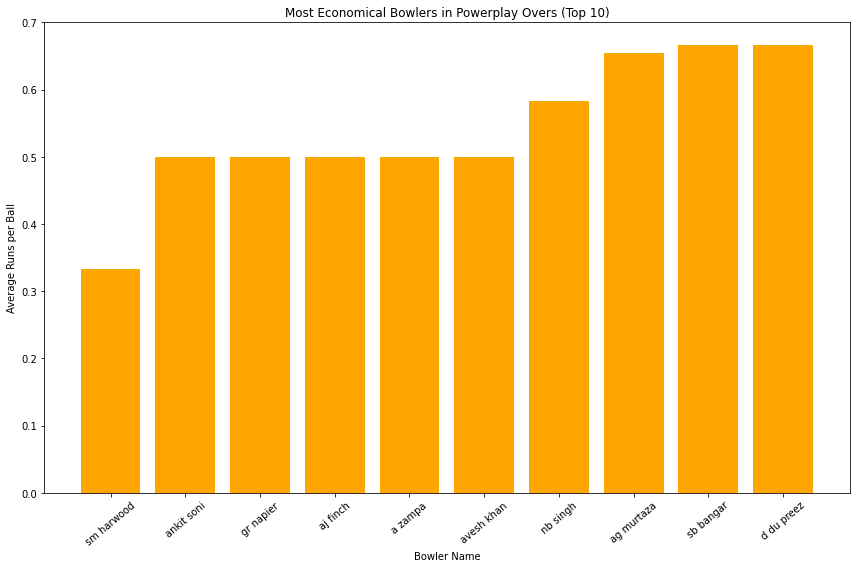

In [0]:
economical_bowlers_pd = economical_bowlers_powerplay.toPandas()

plt.figure(figsize=(12,8))
top_economical_bowlers = economical_bowlers_pd.nsmallest(10, 'avg_runs_per_ball')
plt.bar(top_economical_bowlers['player_name'], top_economical_bowlers['avg_runs_per_ball'], color='orange')
plt.xlabel('Bowler Name')
plt.ylabel('Average Runs per Ball')
plt.title('Most Economical Bowlers in Powerplay Overs (Top 10)')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

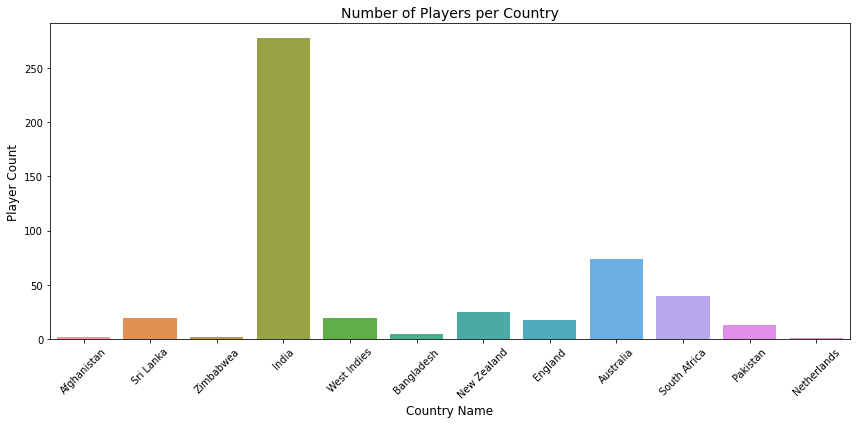

In [0]:

import matplotlib.pyplot as plt
import seaborn as sns
player_name_country_pd = player_name_country.toPandas()
plt.figure(figsize=(12, 6))
sns.barplot(x='country_name', y='player_count', data=player_name_country_pd)
plt.title('Number of Players per Country', fontsize=14)
plt.xlabel('Country Name', fontsize=12)
plt.ylabel('Player Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [0]:

# Execute SQL Query
dismissal_types = spark.sql("""
SELECT out_type, COUNT(*) AS frequency
FROM ball_by_balls
WHERE out_type IS NOT NULL
GROUP BY out_type
ORDER BY frequency DESC""")

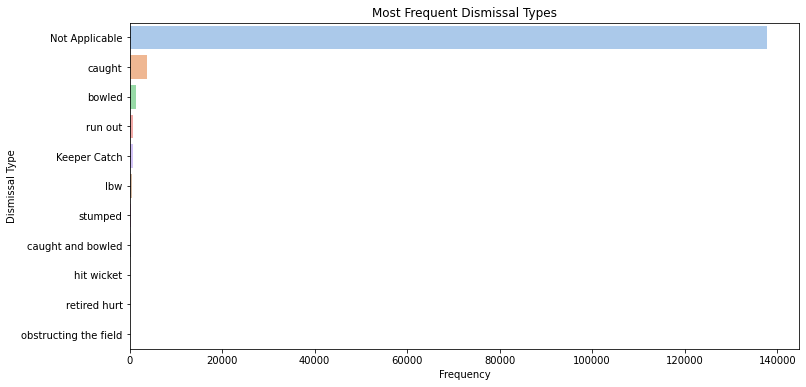

In [0]:
 #Convert to Pandas DataFrame
dismissal_types_pd = dismissal_types.toPandas()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='out_type', data=dismissal_types_pd, palette='pastel')
plt.title('Most Frequent Dismissal Types')
plt.xlabel('Frequency')
plt.ylabel('Dismissal Type')
plt.show()
     

In [0]:
scores_by_venue = spark.sql("""
SELECT venue_name, AVG(total_runs) AS average_score, MAX(total_runs) AS highest_score
FROM (
    SELECT ball_by_balls.match_id, Matchs.venue_name, SUM(runs_scored) AS total_runs
    FROM ball_by_balls
    JOIN Matchs ON ball_by_balls.match_id = Matchs.match_id
    GROUP BY ball_by_balls.match_id, Matchs.venue_name
)
GROUP BY venue_name
ORDER BY average_score DESC""")
scores_by_venue.show(10)

+--------------------+------------------+-------------+
|          venue_name|     average_score|highest_score|
+--------------------+------------------+-------------+
|   Brabourne Stadium| 325.8181818181818|          399|
|Saurashtra Cricke...|             319.1|          393|
|Punjab Cricket As...|317.42857142857144|          341|
|    Barabati Stadium|311.57142857142856|          404|
|          Green Park|             308.0|          378|
|Maharashtra Crick...|302.06666666666666|          377|
|Rajiv Gandhi Inte...|             302.0|          365|
|Himachal Pradesh ...| 301.1111111111111|          371|
|MA Chidambaram St...| 299.7291666666667|          447|
|Sardar Patel Stad...|             298.0|          377|
+--------------------+------------------+-------------+
only showing top 10 rows



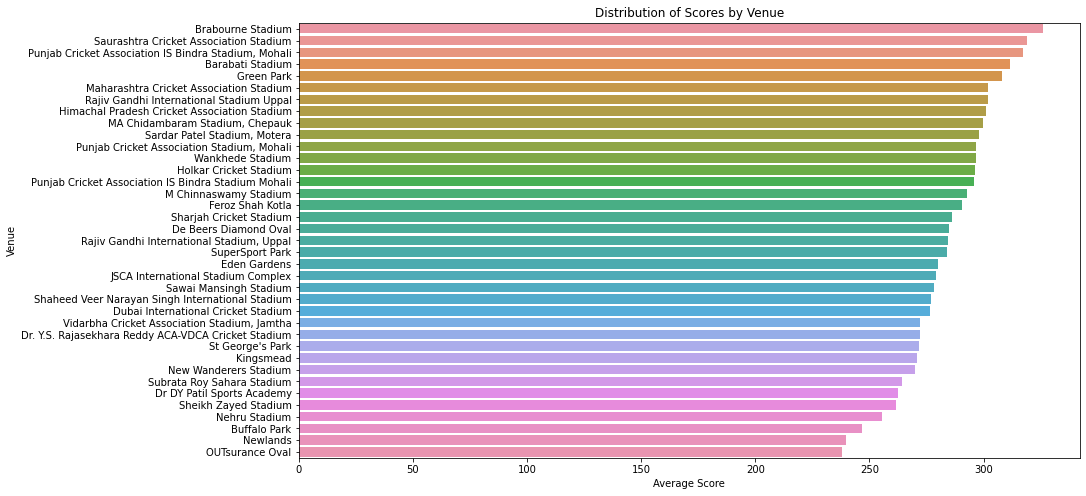

In [0]:

scores_by_venue_pd = scores_by_venue.toPandas()
plt.figure(figsize=(14, 8))
sns.barplot(x='average_score', y='venue_name', data=scores_by_venue_pd)
plt.title('Distribution of Scores by Venue')
plt.xlabel('Average Score')
plt.ylabel('Venue')
plt.show()

In [0]:
dismissal_types = spark.sql("""
SELECT out_type, COUNT(*) AS frequency
FROM ball_by_balls
WHERE out_type IS NOT NULL
GROUP BY out_type
ORDER BY frequency DESC
""")
dismissal_types.show(10)


+-----------------+---------+
|         out_type|frequency|
+-----------------+---------+
|   Not Applicable|   137852|
|           caught|     3678|
|           bowled|     1382|
|          run out|      744|
|     Keeper Catch|      695|
|              lbw|      455|
|          stumped|      222|
|caught and bowled|      211|
|       hit wicket|        9|
|     retired hurt|        9|
+-----------------+---------+
only showing top 10 rows



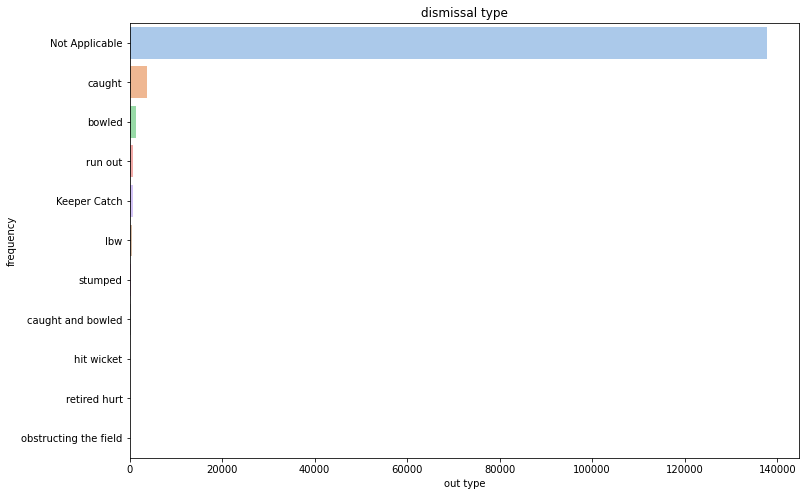

In [0]:
dismissal_types_pd = dismissal_types.toPandas()
plt.figure(figsize = (12,8))
sns.barplot(x = 'frequency',y = 'out_type',data = dismissal_types_pd,palette = 'pastel')
plt.title("dismissal type")
plt.xlabel("out type")
plt.ylabel("frequency")
plt.show()